📦 Initializing system and installing libraries...

🖼️ Generating 5x5 Validation Preview...


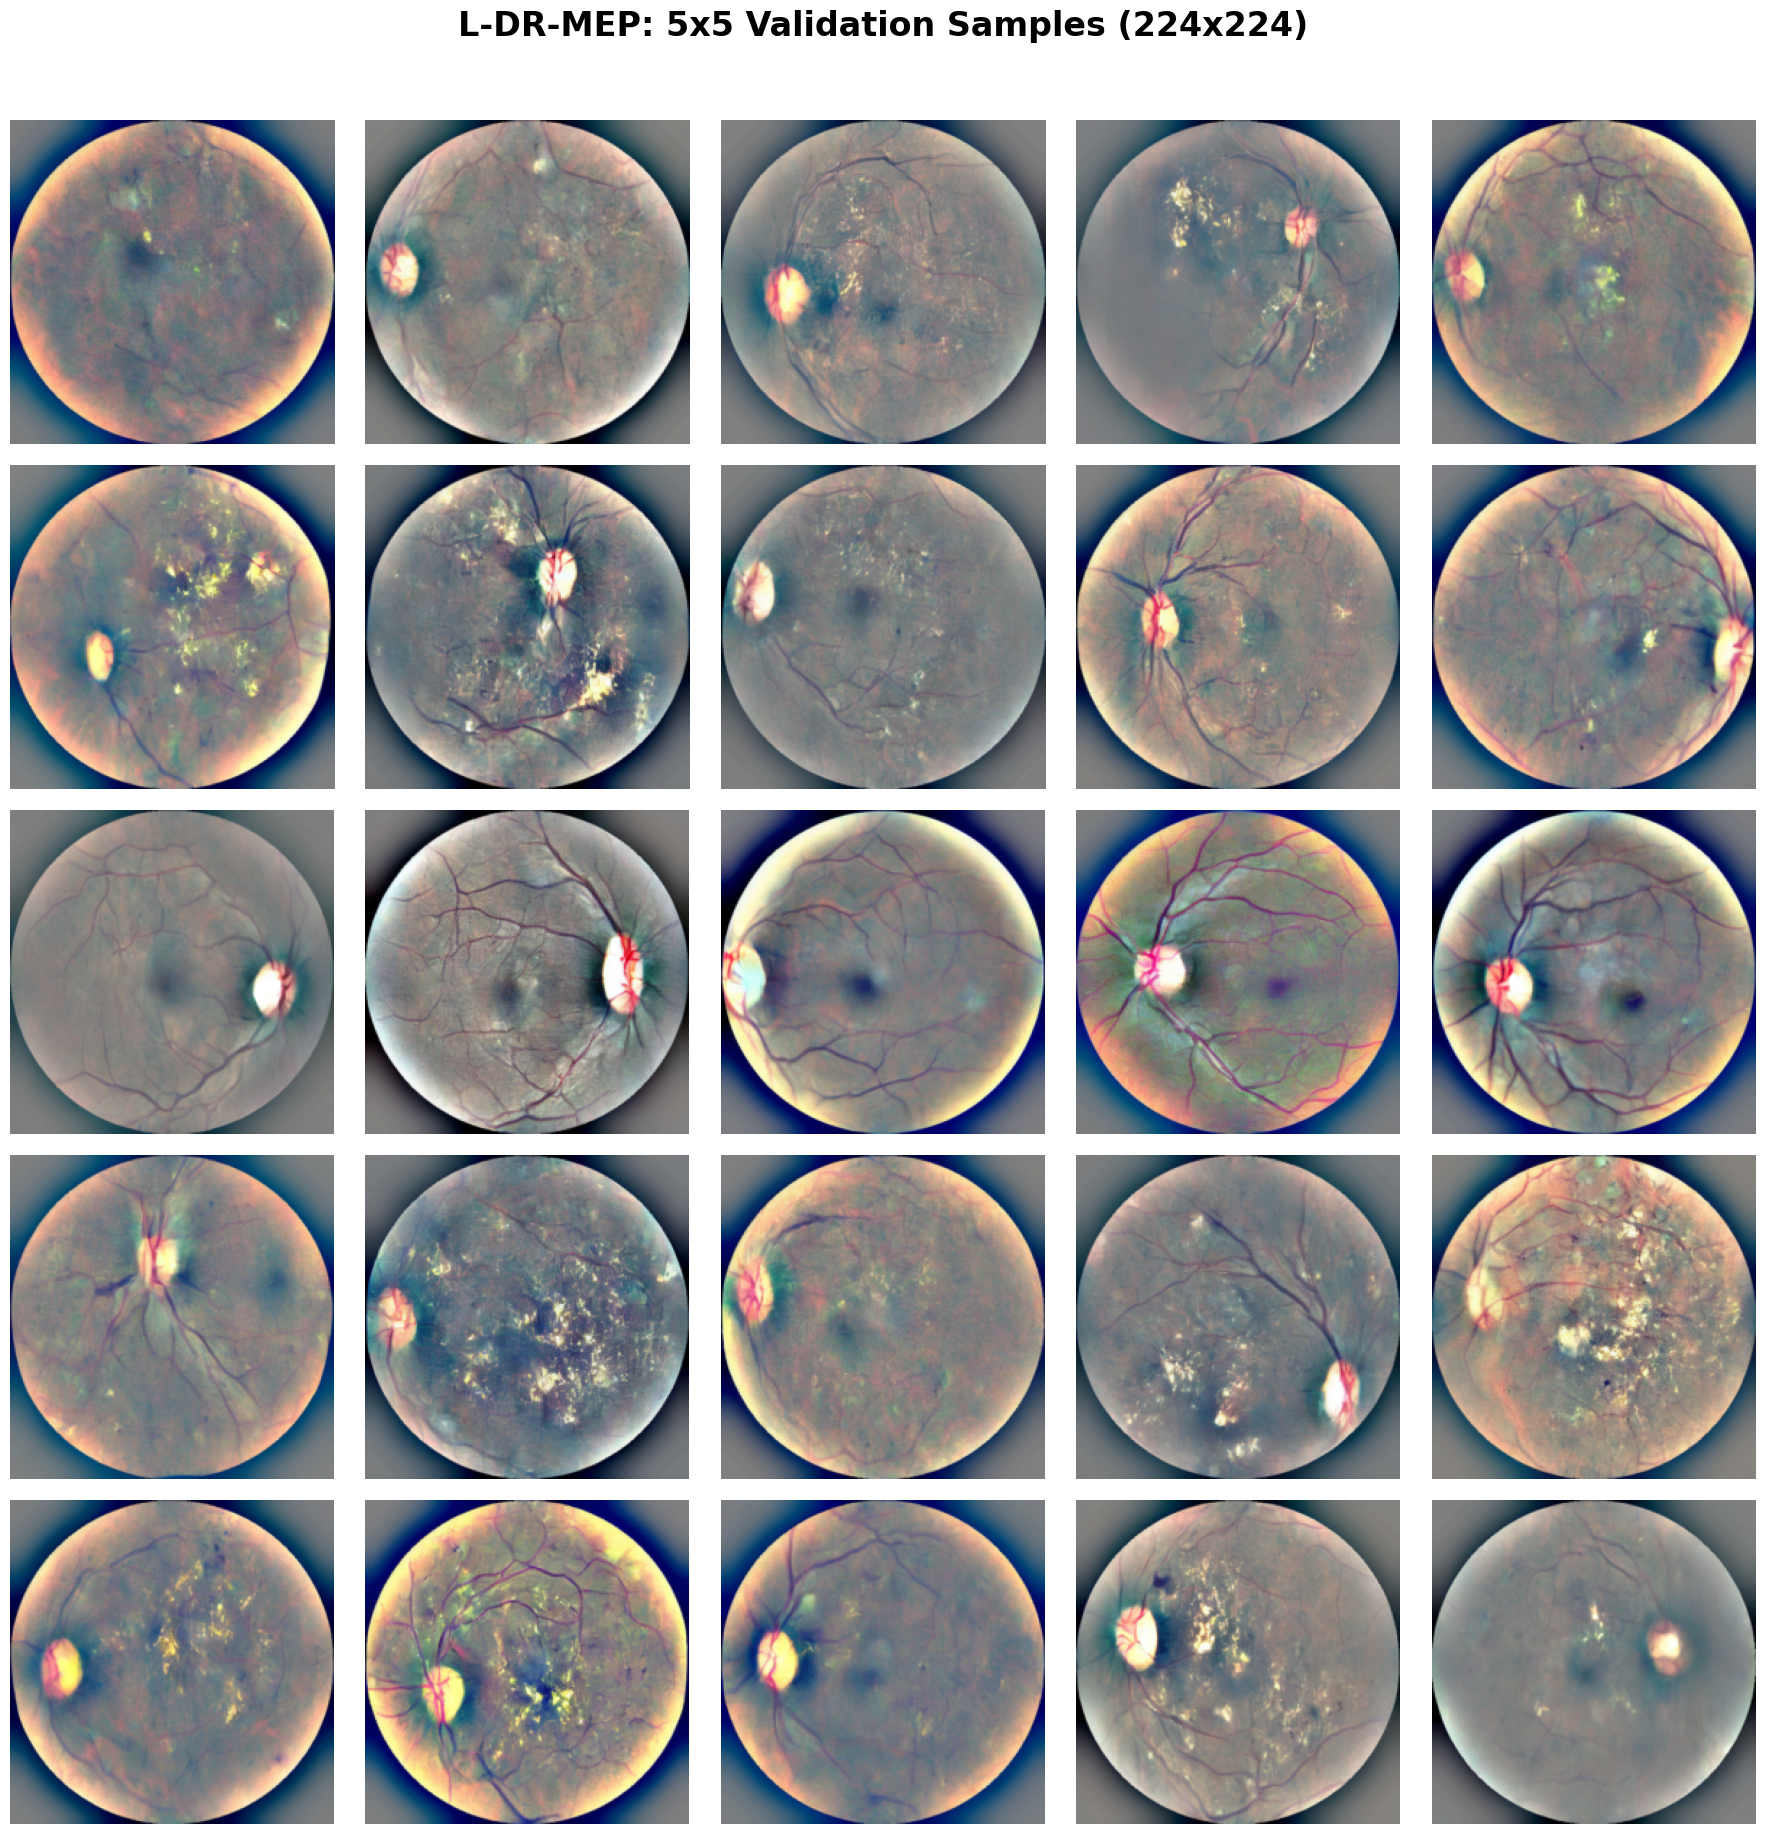


🚀 Training ResNet50...


Epoch 1:   0%|          | 0/302 [00:00<?, ?it/s]

📊 ResNet50 Epoch 1 - Train Acc: 0.5334 | Val Acc: 0.6940


Epoch 2:   0%|          | 0/302 [00:00<?, ?it/s]

📊 ResNet50 Epoch 2 - Train Acc: 0.6956 | Val Acc: 0.7896


Epoch 3:   0%|          | 0/302 [00:00<?, ?it/s]

📊 ResNet50 Epoch 3 - Train Acc: 0.8212 | Val Acc: 0.7814


Epoch 4:   0%|          | 0/302 [00:00<?, ?it/s]

📊 ResNet50 Epoch 4 - Train Acc: 0.9224 | Val Acc: 0.6967


Epoch 5:   0%|          | 0/302 [00:00<?, ?it/s]

📊 ResNet50 Epoch 5 - Train Acc: 0.9510 | Val Acc: 0.7213


Epoch 6:   0%|          | 0/302 [00:00<?, ?it/s]

📊 ResNet50 Epoch 6 - Train Acc: 0.9689 | Val Acc: 0.6803


Epoch 7:   0%|          | 0/302 [00:00<?, ?it/s]

📊 ResNet50 Epoch 7 - Train Acc: 0.9650 | Val Acc: 0.7213


Epoch 8:   0%|          | 0/302 [00:00<?, ?it/s]

📊 ResNet50 Epoch 8 - Train Acc: 0.9684 | Val Acc: 0.7049


Epoch 9:   0%|          | 0/302 [00:00<?, ?it/s]

📊 ResNet50 Epoch 9 - Train Acc: 0.9779 | Val Acc: 0.7022


Epoch 10:   0%|          | 0/302 [00:00<?, ?it/s]

📊 ResNet50 Epoch 10 - Train Acc: 0.9813 | Val Acc: 0.7158


Epoch 11:   0%|          | 0/302 [00:00<?, ?it/s]

📊 ResNet50 Epoch 11 - Train Acc: 0.9858 | Val Acc: 0.6557


Epoch 12:   0%|          | 0/302 [00:00<?, ?it/s]

📊 ResNet50 Epoch 12 - Train Acc: 0.9810 | Val Acc: 0.6776


Epoch 13:   0%|          | 0/302 [00:00<?, ?it/s]

📊 ResNet50 Epoch 13 - Train Acc: 0.9745 | Val Acc: 0.6803


Epoch 14:   0%|          | 0/302 [00:00<?, ?it/s]

📊 ResNet50 Epoch 14 - Train Acc: 0.9797 | Val Acc: 0.6612


Epoch 15:   0%|          | 0/302 [00:00<?, ?it/s]

📊 ResNet50 Epoch 15 - Train Acc: 0.9870 | Val Acc: 0.6967


Epoch 16:   0%|          | 0/302 [00:00<?, ?it/s]

📊 ResNet50 Epoch 16 - Train Acc: 0.9952 | Val Acc: 0.6940


Epoch 17:   0%|          | 0/302 [00:00<?, ?it/s]

📊 ResNet50 Epoch 17 - Train Acc: 0.9903 | Val Acc: 0.7186


Epoch 18:   0%|          | 0/302 [00:00<?, ?it/s]

📊 ResNet50 Epoch 18 - Train Acc: 0.9855 | Val Acc: 0.7158


Epoch 19:   0%|          | 0/302 [00:00<?, ?it/s]

📊 ResNet50 Epoch 19 - Train Acc: 0.9814 | Val Acc: 0.7186


Epoch 20:   0%|          | 0/302 [00:00<?, ?it/s]

📊 ResNet50 Epoch 20 - Train Acc: 0.9910 | Val Acc: 0.6858


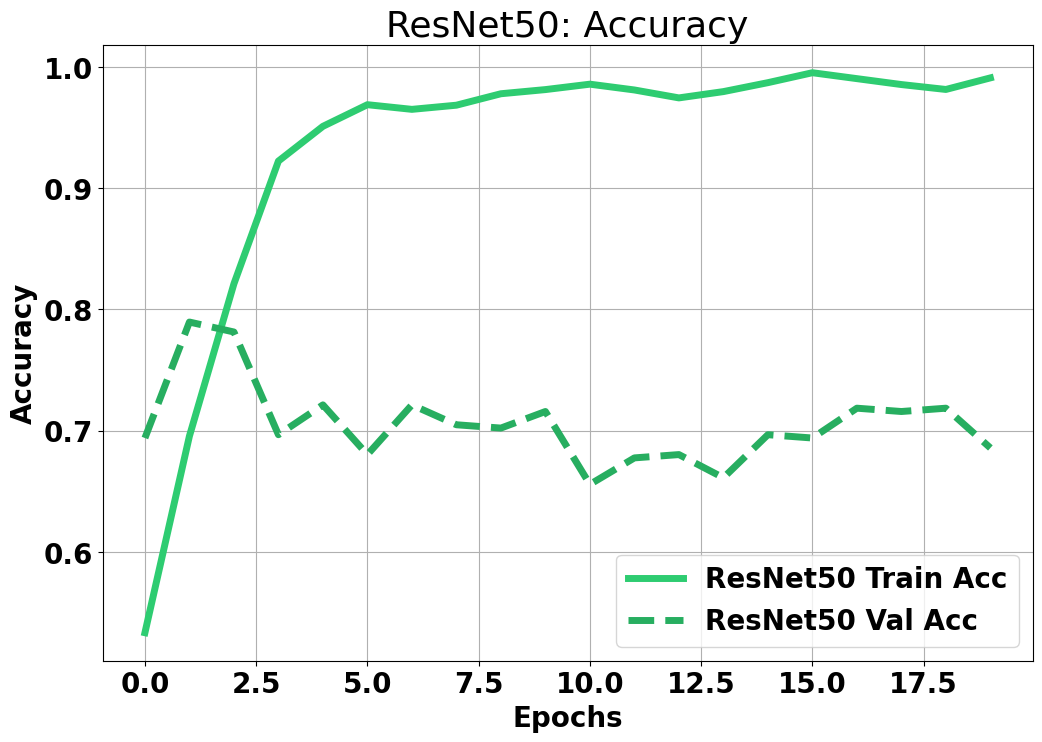

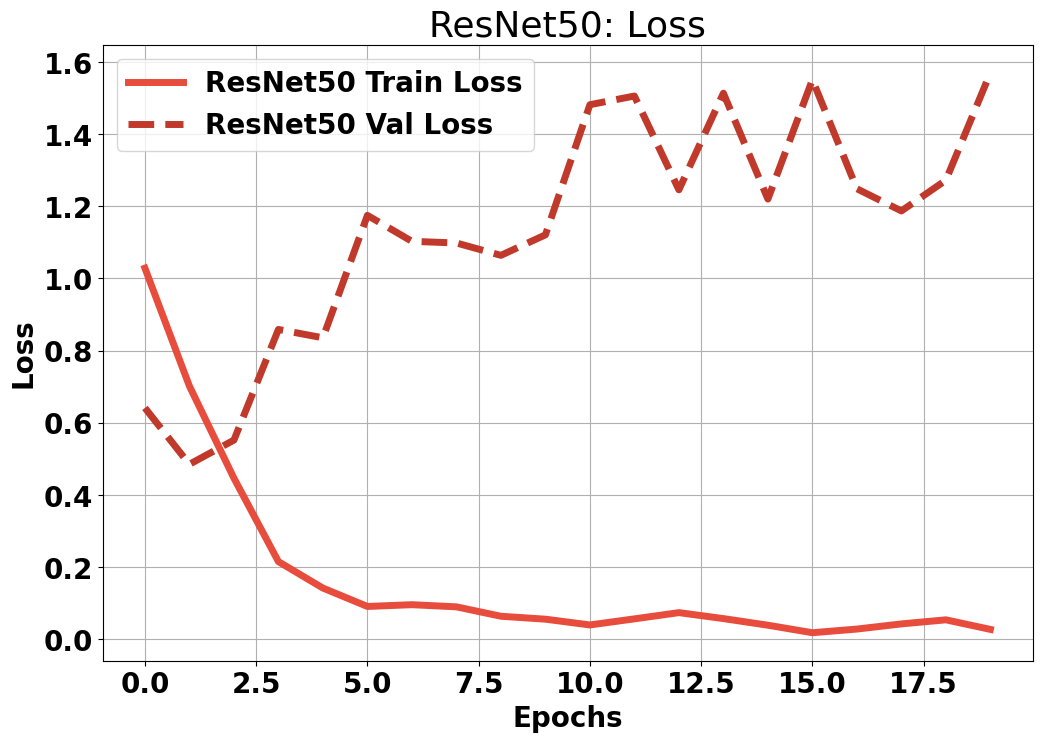

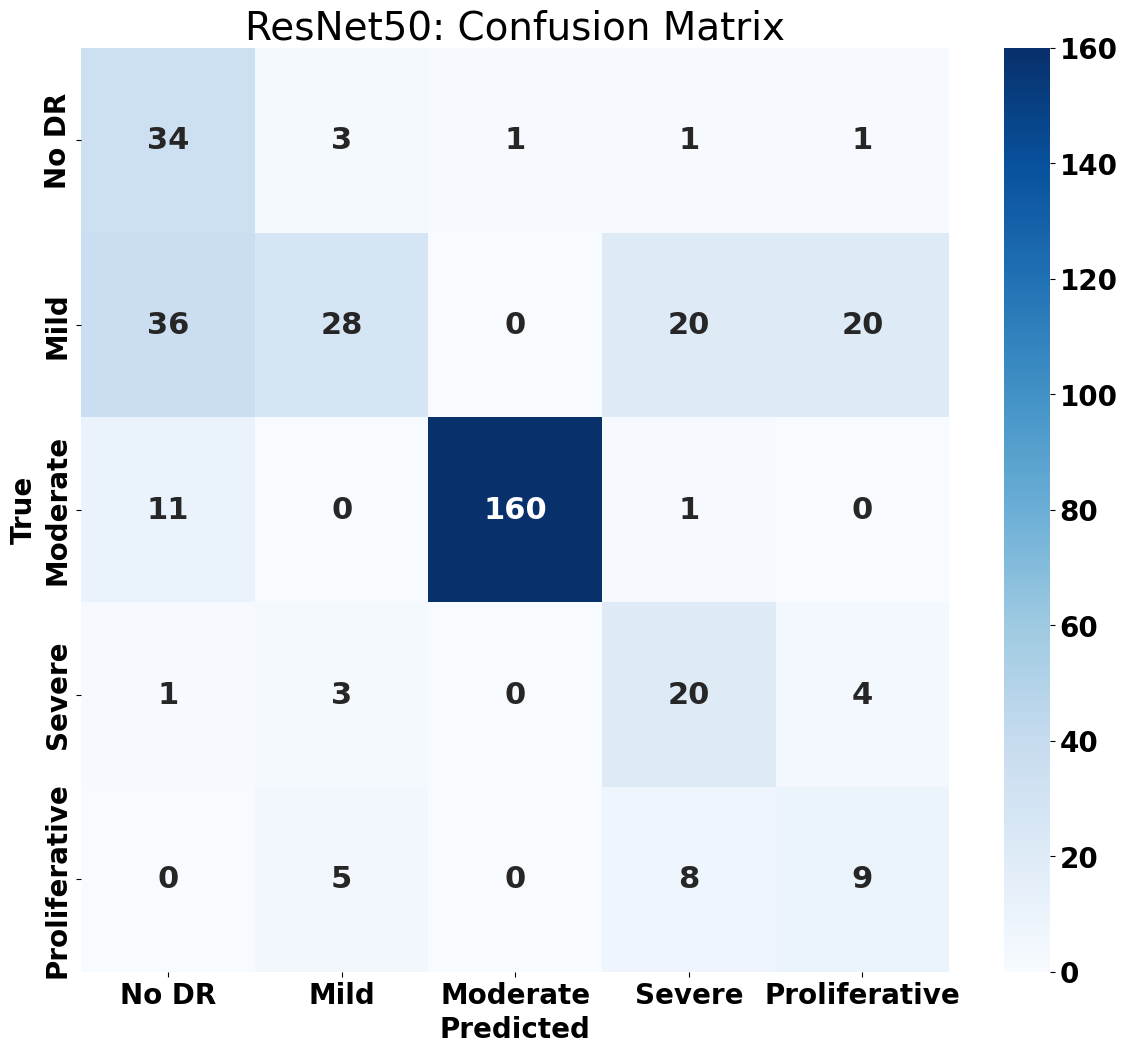

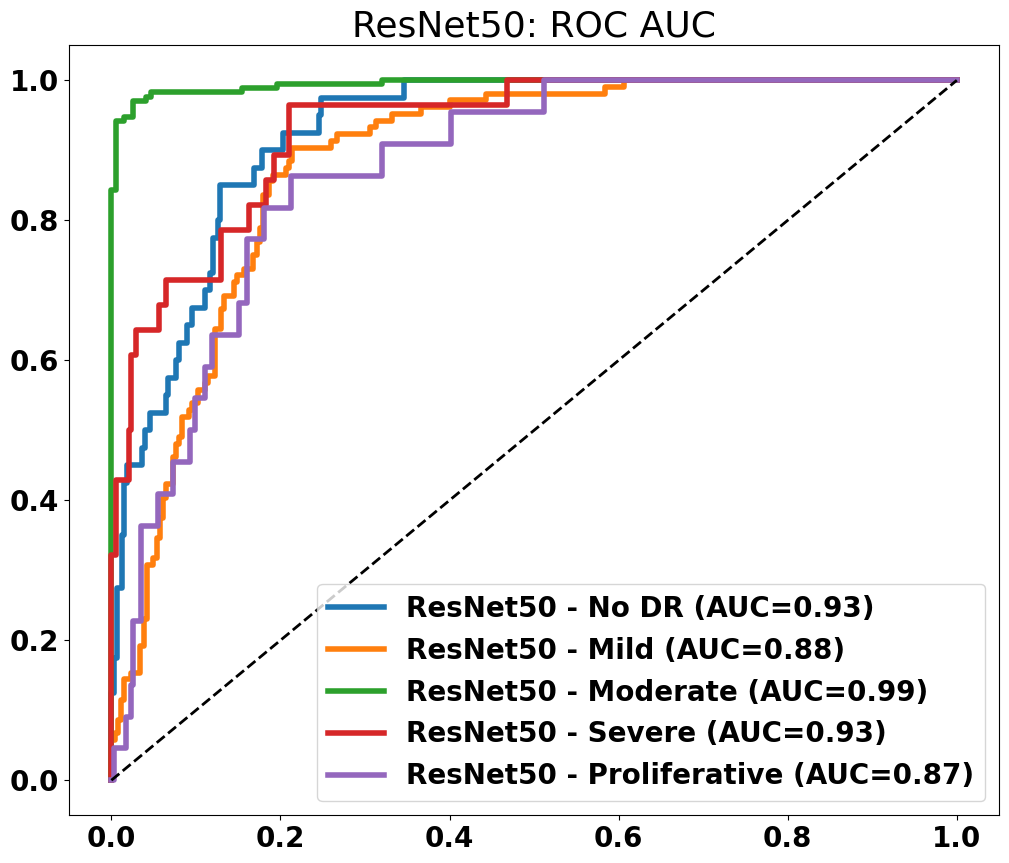

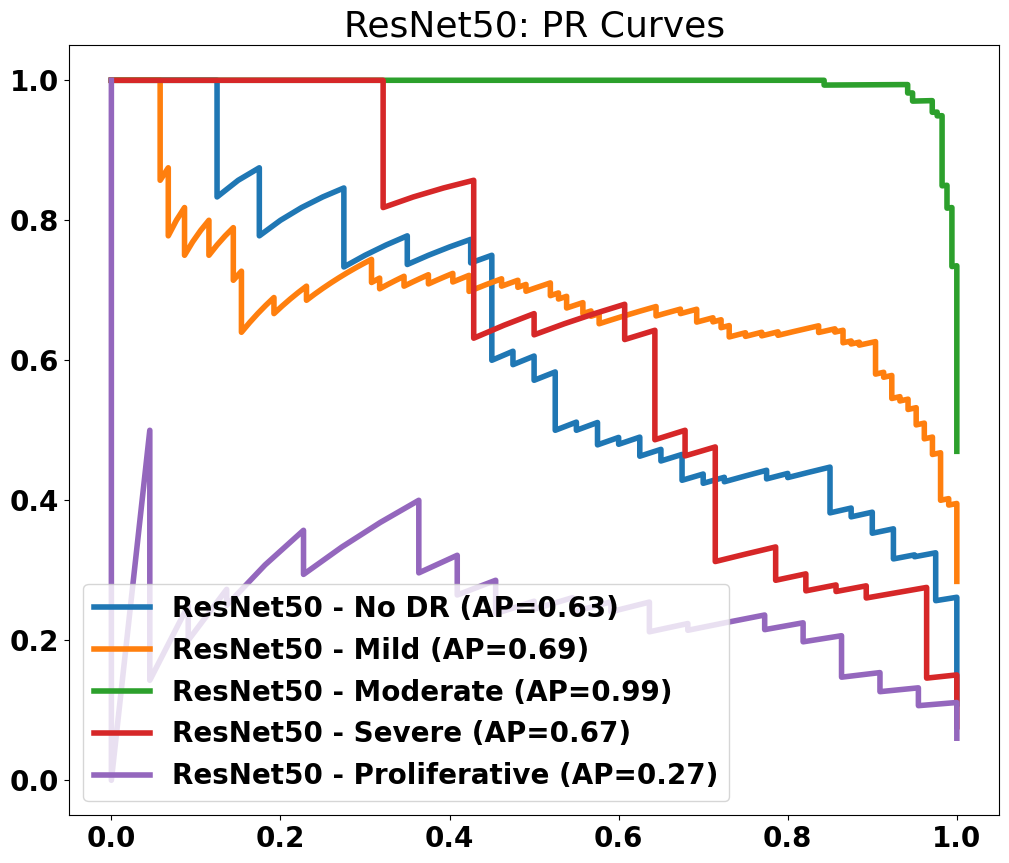


🚀 Training DenseNet121...


Epoch 1:   0%|          | 0/302 [00:00<?, ?it/s]

📊 DenseNet121 Epoch 1 - Train Acc: 0.5794 | Val Acc: 0.7350


Epoch 2:   0%|          | 0/302 [00:00<?, ?it/s]

📊 DenseNet121 Epoch 2 - Train Acc: 0.7006 | Val Acc: 0.7486


Epoch 3:   0%|          | 0/302 [00:00<?, ?it/s]

📊 DenseNet121 Epoch 3 - Train Acc: 0.7965 | Val Acc: 0.7596


Epoch 4:   0%|          | 0/302 [00:00<?, ?it/s]

In [ ]:
# ==================================================================================
# L-DR-MEP: Final Benchmarking Pipeline (11 Models @ 224x224) - FIXED
# Includes: Robust Head Fixing, Metric Tracking, and ZIP Export of 56 Plots
# ==================================================================================

print("📦 Initializing system and installing libraries...")
!pip install -q kaggle diffusers transformers accelerate tqdm
import os, shutil, torch, torch.nn as nn, torch.optim as optim, numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from tqdm.auto import tqdm
from google.colab import files

# --- 1. DATASET SETUP ---
if not os.path.exists("/root/.kaggle/kaggle.json"):
    print("🔑 Upload your 'kaggle.json' file:")
    uploaded = files.upload()
    !mkdir -p ~/.kaggle && cp kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

if not os.path.exists("/content/dataset"):
    !kaggle datasets download -d touhidalam08/ldr-aptos-diabetics-retinopathy --quiet
    !unzip -q ldr-aptos-diabetics-retinopathy.zip -d /content/dataset

DATA_ROOT = "/content/dataset/"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
CLASS_NAMES = ["No DR", "Mild", "Moderate", "Severe", "Proliferative"]
PLOT_DIR = "/content/LDR_Results_Plots"
if os.path.exists(PLOT_DIR): shutil.rmtree(PLOT_DIR)
os.makedirs(PLOT_DIR, exist_ok=True)

# --- 2. DATA LOADERS (224x224) ---
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_dataset = datasets.ImageFolder(os.path.join(DATA_ROOT, 'val'), transform)
train_loader = DataLoader(datasets.ImageFolder(os.path.join(DATA_ROOT, 'train'), transform), batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# --- 3. 5x5 VALIDATION PREVIEW ---
def plot_5x5_preprocessed_validation():
    print("\n🖼️ Generating 5x5 Validation Preview...")
    plt.rcParams.update({'font.size': 14, 'font.weight': 'bold'})
    fig, axes = plt.subplots(5, 5, figsize=(18, 18))
    for cls_idx in range(5):
        indices = [i for i, (_, label) in enumerate(val_dataset.imgs) if label == cls_idx][:5]
        for col, idx in enumerate(indices):
            img, _ = val_dataset[idx]
            img = img.permute(1, 2, 0).numpy()
            img = np.clip((img * np.array([0.229, 0.224, 0.225])) + np.array([0.485, 0.456, 0.406]), 0, 1)
            axes[cls_idx, col].imshow(img)
            axes[cls_idx, col].axis('off')
            if col == 0: axes[cls_idx, col].set_ylabel(CLASS_NAMES[cls_idx], fontsize=18, fontweight='bold')
    plt.suptitle("L-DR-MEP: 5x5 Validation Samples (224x224)", fontsize=24, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig(f"{PLOT_DIR}/Preprocessing_5x5_Preview.png", dpi=300)
    plt.show()

# --- 4. NAMED VISUALIZATION SUITE ---
def plot_metrics(name, history, labels, probs, preds):
    plt.rcParams.update({'font.size': 20, 'font.weight': 'bold', 'axes.labelweight': 'bold'})

    # Accuracy
    plt.figure(figsize=(12, 8))
    plt.plot(history['train_acc'], label=f'{name} Train Acc', lw=5, color='#2ecc71')
    plt.plot(history['val_acc'], label=f'{name} Val Acc', lw=5, ls='--', color='#27ae60')
    plt.title(f'{name}: Accuracy', fontsize=26); plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend(); plt.grid(True)
    plt.savefig(f"{PLOT_DIR}/{name}_Accuracy.png", dpi=300); plt.show()

    # Loss
    plt.figure(figsize=(12, 8))
    plt.plot(history['train_loss'], label=f'{name} Train Loss', lw=5, color='#e74c3c')
    plt.plot(history['val_loss'], label=f'{name} Val Loss', lw=5, ls='--', color='#c0392b')
    plt.title(f'{name}: Loss', fontsize=26); plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend(); plt.grid(True)
    plt.savefig(f"{PLOT_DIR}/{name}_Loss.png", dpi=300); plt.show()

    # Confusion Matrix
    plt.figure(figsize=(14, 12))
    sns.heatmap(confusion_matrix(labels, preds), annot=True, fmt='d', cmap='Blues',
                xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES, annot_kws={"size": 22, "weight": "bold"})
    plt.title(f'{name}: Confusion Matrix', fontsize=28); plt.ylabel('True'); plt.xlabel('Predicted')
    plt.savefig(f"{PLOT_DIR}/{name}_ConfusionMatrix.png", dpi=300); plt.show()

    # ROC AUC
    plt.figure(figsize=(12, 10))
    for i in range(5):
        fpr, tpr, _ = roc_curve(np.array(labels) == i, np.array(probs)[:, i])
        plt.plot(fpr, tpr, label=f'{name} - {CLASS_NAMES[i]} (AUC={auc(fpr, tpr):.2f})', lw=4)
    plt.plot([0, 1], [0, 1], 'k--', lw=2); plt.title(f'{name}: ROC AUC', fontsize=26); plt.legend()
    plt.savefig(f"{PLOT_DIR}/{name}_ROC_AUC.png", dpi=300); plt.show()

    # PR Curve
    plt.figure(figsize=(12, 10))
    for i in range(5):
        p, r, _ = precision_recall_curve(np.array(labels) == i, np.array(probs)[:, i])
        ap = average_precision_score(np.array(labels) == i, np.array(probs)[:, i])
        plt.plot(r, p, label=f'{name} - {CLASS_NAMES[i]} (AP={ap:.2f})', lw=4)
    plt.title(f'{name}: PR Curves', fontsize=26); plt.legend()
    plt.savefig(f"{PLOT_DIR}/{name}_PR_Curve.png", dpi=300); plt.show()

# --- 5. TRAINING ENGINE ---
def train_engine(name, model, epochs=20):
    print(f"\n🚀 Training {name}...")
    model = model.to(DEVICE)
    criterion, optimizer = nn.CrossEntropyLoss(), optim.Adam(model.parameters(), lr=1e-4)
    hist = {'train_acc': [], 'val_acc': [], 'train_loss': [], 'val_loss': []}

    for epoch in range(epochs):
        model.train()
        t_loss, t_corr = 0.0, 0
        for imgs, lbls in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
            imgs, lbls = imgs.to(DEVICE), lbls.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, lbls)
            loss.backward(); optimizer.step()
            t_loss += loss.item() * imgs.size(0)
            t_corr += torch.sum(torch.max(outputs, 1)[1] == lbls.data)

        model.eval()
        v_loss, v_corr, y_true, y_pred, y_prob = 0.0, 0, [], [], []
        with torch.no_grad():
            for imgs, lbls in val_loader:
                imgs, lbls = imgs.to(DEVICE), lbls.to(DEVICE)
                outputs = model(imgs)
                v_loss += criterion(outputs, lbls).item() * imgs.size(0)
                probs = torch.softmax(outputs, dim=1)
                preds = torch.max(outputs, 1)[1]
                v_corr += torch.sum(preds == lbls.data)
                y_true.extend(lbls.cpu().numpy()); y_pred.extend(preds.cpu().numpy()); y_prob.extend(probs.cpu().numpy())

        hist['train_acc'].append(t_corr.double().item() / len(train_loader.dataset))
        hist['val_acc'].append(v_corr.double().item() / len(val_loader.dataset))
        hist['train_loss'].append(t_loss / len(train_loader.dataset))
        hist['val_loss'].append(v_loss / len(val_loader.dataset))
        print(f"📊 {name} Epoch {epoch+1} - Train Acc: {hist['train_acc'][-1]:.4f} | Val Acc: {hist['val_acc'][-1]:.4f}")

    plot_metrics(name, hist, y_true, y_prob, y_pred)

# --- 6. INITIALIZE ARCHITECTURES ---
archs = {
    "ResNet50": models.resnet50(weights='DEFAULT'),
    "DenseNet121": models.densenet121(weights='DEFAULT'),
    "EfficientNet_B0": models.efficientnet_b0(weights='DEFAULT'),
    "VGG16_BN": models.vgg16_bn(weights='DEFAULT'),
    "MobileNet_V2": models.mobilenet_v2(weights='DEFAULT'),
    "ResNext50": models.resnext50_32x4d(weights='DEFAULT'),
    "WideResNet50": models.wide_resnet50_2(weights='DEFAULT'),
    "ConvNeXt_Tiny": models.convnext_tiny(weights='DEFAULT'),
    "RegNet_Y_800MF": models.regnet_y_800mf(weights='DEFAULT'),
    "ShuffleNet_V2": models.shufflenet_v2_x1_0(weights='DEFAULT'),
    "SqueezeNet1_1": models.squeezenet1_1(weights='DEFAULT')
}

# --- ROBUST HEAD FIXER ---
for name, m in archs.items():
    if hasattr(m, 'fc') and not "ShuffleNet" in name:
        m.fc = nn.Linear(m.fc.in_features, 5)
    elif "DenseNet" in name:
        m.classifier = nn.Linear(m.classifier.in_features, 5)
    elif "VGG" in name:
        m.classifier[6] = nn.Linear(m.classifier[6].in_features, 5)
    elif "MobileNet" in name:
        m.classifier[1] = nn.Linear(m.classifier[1].in_features, 5)
    elif "EfficientNet" in name:
        m.classifier[1] = nn.Linear(m.classifier[1].in_features, 5)
    elif "ConvNeXt" in name:
        m.classifier[2] = nn.Linear(m.classifier[2].in_features, 5)
    elif "ShuffleNet" in name:
        m.fc = nn.Linear(1024, 5)
    elif "SqueezeNet" in name:
        m.classifier[1] = nn.Conv2d(512, 5, kernel_size=(1,1))
        m.num_classes = 5

# --- 7. RUN ---
if __name__ == "__main__":
    plot_5x5_preprocessed_validation()
    for name, m in archs.items():
        train_engine(name, m)

    # Final step: Zip all plots for download
    print("\n📦 Zipping all plots for download...")
    shutil.make_archive("/content/L-DR-MEP_Results_Plots", 'zip', PLOT_DIR)
    files.download("/content/L-DR-MEP_Results_Plots.zip")
    print("✅ Complete.")